# 网络可视化

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

## 初级

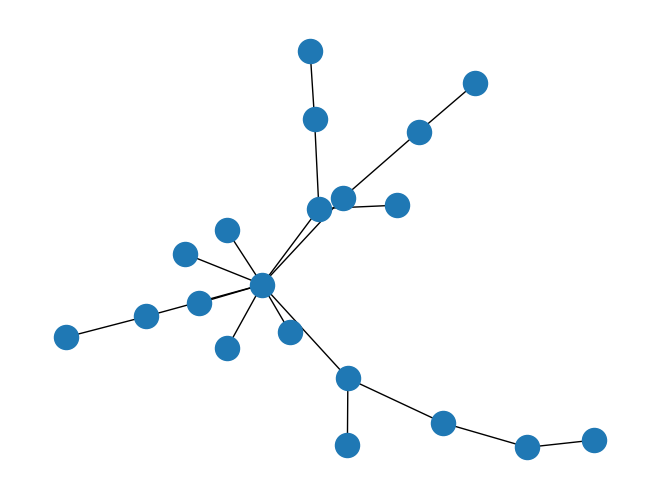

In [9]:
G = nx.barabasi_albert_graph(20, 1)
nx.draw(G)

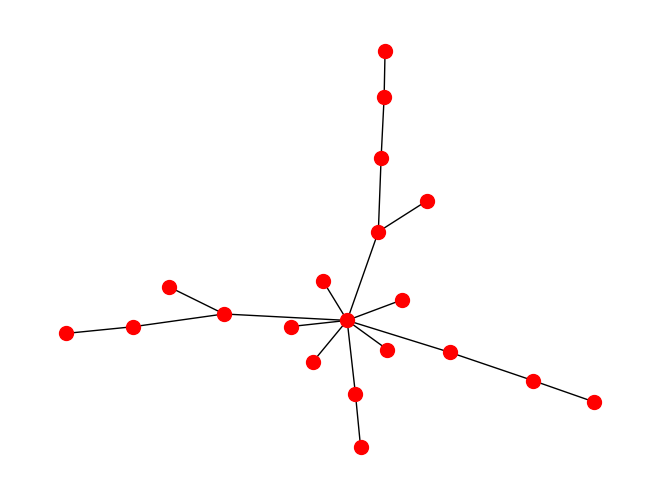

In [10]:
# 设置布局，节点大小，节点颜色，连边颜色，标签等
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=100, node_color="red")

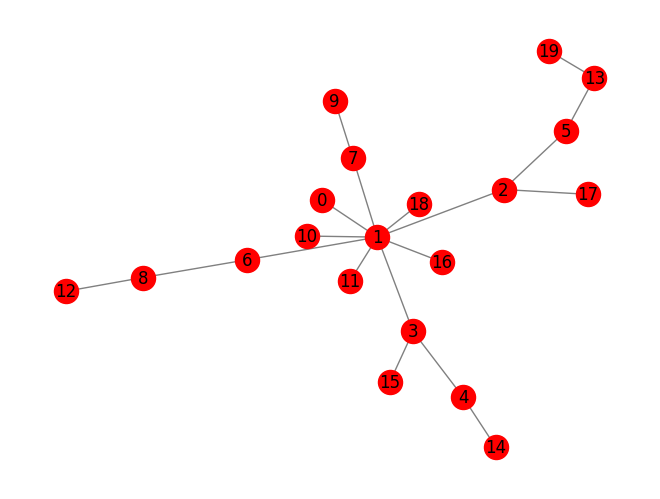

In [11]:
# 当设置的属性较多时，可以将其保存在字典中，以**不定长参数传入
options = {
    'pos': nx.spring_layout(G),
    'node_size': 300,
    'node_color': "red",
    'edge_color': "gray",
    'width': 1.0, # 连边粗细
    'with_labels': True,
}
nx.draw(G, **options)

## 进阶

In [12]:
# 无向加权图：自定义节点坐标（布局），适用于绘制小规模网络
# 创建一个无向加权图
G = nx.Graph()
nodes = [0,1,2,3,4,5,6,7]
edge_list = [(0,1,2),(0,2,8),(0,3,1),(1,2,6),
                (1, 4, 1), (2, 3, 7), (2, 4, 5), (2, 5, 1),
                (2,6,2),(3,6,9),(4,5,3),(4,7,8),
                (5,6,4),(5,7,6),(6,7,3)]
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edge_list)

{(0, 1): Text(-1.5, 0.5, '2'),
 (0, 2): Text(-1.5, 0.0, '8'),
 (0, 3): Text(-1.5, -0.5, '1'),
 (1, 2): Text(-1.0, 0.5, '6'),
 (1, 4): Text(0.0, 1.0, '1'),
 (2, 3): Text(-1.0, -0.5, '7'),
 (2, 4): Text(0.0, 0.5, '5'),
 (2, 5): Text(0.0, 0.0, '1'),
 (2, 6): Text(0.0, -0.5, '2'),
 (3, 6): Text(0.0, -1.0, '9'),
 (4, 5): Text(1.0, 0.5, '3'),
 (4, 7): Text(1.5, 0.5, '8'),
 (5, 6): Text(1.0, -0.5, '4'),
 (5, 7): Text(1.5, 0.0, '6'),
 (6, 7): Text(1.5, -0.5, '3')}

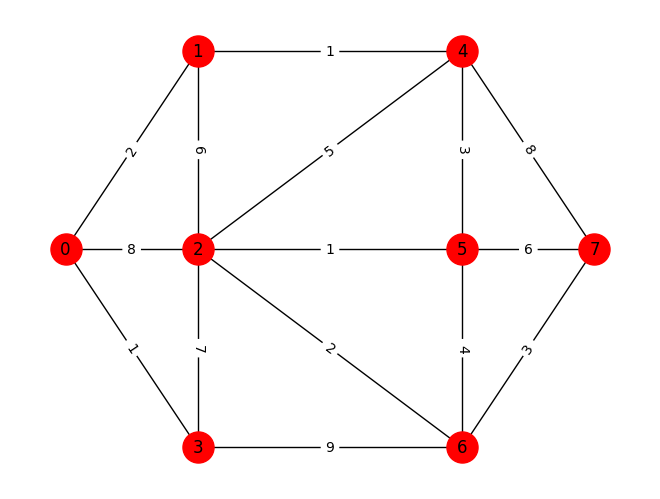

In [13]:
# 自定义各个节点的坐标
pos = {0: (-2,0), 1:(-1,1), 2:(-1,0), 3:(-1,-1),
        4: (1,1), 5:(1,0), 6:(1,-1), 7:(2,0)}
nx.draw(G, pos, node_size=500, node_color="red", with_labels=True)

# 将连边标签设定为其权重值
e_labels = {(0, 1):"2",(0, 2):"8",(0, 3):"1",(1, 2):"6",
            (1, 4): "1", (2, 3): "7", (2, 4): "5", (2, 5): "1",
            (2, 6):"2",(3,6):"9",(4, 5):"3",(4,7):"8",
            (5, 6):"4",(5,7):"6",(6, 7):"3"}
nx.draw_networkx_edge_labels(G, pos, edge_labels=e_labels)

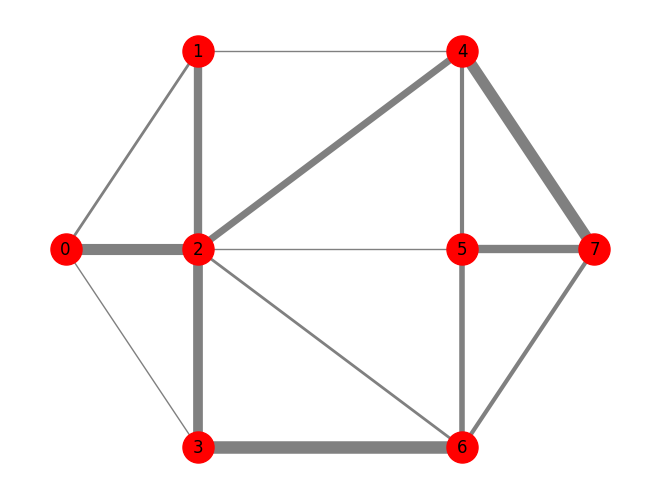

In [14]:
# 设置连边粗细与权重成正比
edgeWidth = [G.get_edge_data(*e)['weight'] for e in G.edges()]
options = {
    'pos': pos,
    'node_size': 500,
    'node_color': "red",
    'edge_color': "gray",
    'width': edgeWidth,
    'with_labels': True,
}
nx.draw(G, **options)

## 高阶

In [ ]:
G = nx.barabasi_albert_graph(20,2)
# 绘制网络图，按度值大小设定节点大小和颜色
# 设置节点大小与度成正比
nodeSize = [G.degree(i)*100 for i in G.nodes()]
node_colors = [G.degree(i) for i in G.nodes()]
options = {
    'pos': nx.spring_layout(G),
    'node_size': nodeSize,
    'node_color': node_colors,
    'cmap': plt.cm.cool, # 设置节点colormap
    'edge_color': "gray",
    'with_labels': True,
}
nx.draw(G, **options)
plt.show()